# WeatherPy


Three Observations

1.The strongest correlation between variables is temperature and latitude.Both the plot and regression showed evidence that temperatures were indeed greater towards the equater and lesser as you moved towards the poles.

2. There is next to zero correlation between latitudes and cloudiness. The plot actually showed most data points at the 0% and 100%, and r values for correaltion were both tiny.

3. Similarly, there is little relationship between latitude and humidity. For the southern hemisphere the r value was less than 0.01 and the plot showed little evidence of a relationship.

In [36]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json
from scipy.stats import linregress


# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [37]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

626

### Perform API Calls

In [38]:
#Create Query URL
url = "http://api.openweathermap.org/data/2.5/weather?"
query_url = url + "appid=" + weather_api_key + "&units="+"imperial"+"&q="

response = requests.get(query_url + city).json()


In [39]:
#Create lists to hold data
place = []
lat = []
long = []
temp = []
humid = []
cloud = []
wind = []
country = []
date = []

In [40]:
#Creating variables for sets of 50
city_item = 1
city_set = 1

#Loop through list of cities
for city in cities:
    
    if city_item < 51:
        try:
            response = requests.get(query_url + city).json()
            print(f' Processing record {city_item} of Set {city_set} | {city}) ')
            city_item = city_item + 1
            
            #add items to lists as it loops
            place.append(response['name'])
            lat.append(response['coord']['lat'])
            long.append(response['coord']['lon'])
            temp.append(response['main']['temp_max'])
            humid.append(response['main']['humidity'])
            cloud.append(response['clouds']['all'])
            wind.append(response['wind']['speed'])
            country.append(response['sys']['country'])
            date.append(response['dt'])
            
            
        except:
             print(f'City not found. Skipping...')
        continue 
    
    else:
        #change counts for new set
        city_item = 1
        city_set = city_set + 1
        
        
                    
            


 Processing record 1 of Set 1 | hobart) 
 Processing record 2 of Set 1 | luderitz) 
 Processing record 3 of Set 1 | jamestown) 
 Processing record 4 of Set 1 | bambous virieux) 
 Processing record 5 of Set 1 | lorengau) 
 Processing record 6 of Set 1 | kuminskiy) 
 Processing record 7 of Set 1 | tasiilaq) 
 Processing record 8 of Set 1 | umm lajj) 
 Processing record 9 of Set 1 | luorong) 
 Processing record 10 of Set 1 | evensk) 
 Processing record 11 of Set 1 | hilo) 
 Processing record 12 of Set 1 | mount darwin) 
 Processing record 13 of Set 1 | korla) 
 Processing record 14 of Set 1 | saint george) 
 Processing record 15 of Set 1 | belushya guba) 
City not found. Skipping...
 Processing record 16 of Set 1 | karratha) 
 Processing record 17 of Set 1 | taolanaro) 
City not found. Skipping...
 Processing record 18 of Set 1 | kasongo) 
 Processing record 19 of Set 1 | lyubech) 
 Processing record 20 of Set 1 | gorontalo) 
 Processing record 21 of Set 1 | barentsburg) 
City not found. 

 Processing record 27 of Set 4 | butaritari) 
 Processing record 28 of Set 4 | kamenskoye) 
City not found. Skipping...
 Processing record 29 of Set 4 | badamdar) 
 Processing record 30 of Set 4 | haibowan) 
City not found. Skipping...
 Processing record 31 of Set 4 | tazovskiy) 
 Processing record 32 of Set 4 | port lincoln) 
 Processing record 33 of Set 4 | juneau) 
 Processing record 34 of Set 4 | aykhal) 
 Processing record 35 of Set 4 | piacabucu) 
 Processing record 36 of Set 4 | coahuayana) 
 Processing record 37 of Set 4 | paradwip) 
City not found. Skipping...
 Processing record 38 of Set 4 | tarudant) 
City not found. Skipping...
 Processing record 39 of Set 4 | avarua) 
 Processing record 40 of Set 4 | tchaourou) 
 Processing record 41 of Set 4 | mashhad) 
 Processing record 42 of Set 4 | san cristobal) 
 Processing record 43 of Set 4 | kruisfontein) 
 Processing record 44 of Set 4 | coihaique) 
 Processing record 45 of Set 4 | hays) 
 Processing record 46 of Set 4 | novyy u

 Processing record 5 of Set 8 | tura) 
 Processing record 6 of Set 8 | tanout) 
 Processing record 7 of Set 8 | onega) 
 Processing record 8 of Set 8 | oranjemund) 
 Processing record 9 of Set 8 | grand river south east) 
City not found. Skipping...
 Processing record 10 of Set 8 | flinders) 
 Processing record 11 of Set 8 | camacha) 
 Processing record 12 of Set 8 | timra) 
 Processing record 13 of Set 8 | kraslava) 
 Processing record 14 of Set 8 | shimoda) 
 Processing record 15 of Set 8 | cabra) 
 Processing record 16 of Set 8 | dryden) 
 Processing record 17 of Set 8 | kieta) 
 Processing record 18 of Set 8 | vila franca do campo) 
 Processing record 19 of Set 8 | fonte boa) 
 Processing record 20 of Set 8 | tegal) 
 Processing record 21 of Set 8 | chapais) 
 Processing record 22 of Set 8 | senanga) 
 Processing record 23 of Set 8 | buala) 
 Processing record 24 of Set 8 | pareora) 
 Processing record 25 of Set 8 | miramar) 
 Processing record 26 of Set 8 | bagdarin) 
 Processing 

 Processing record 32 of Set 11 | snezhnogorsk) 
 Processing record 33 of Set 11 | ouesso) 
 Processing record 34 of Set 11 | garbova) 
 Processing record 35 of Set 11 | lata) 
 Processing record 36 of Set 11 | eyl) 
 Processing record 37 of Set 11 | scottsburgh) 
City not found. Skipping...
 Processing record 38 of Set 11 | rawson) 
 Processing record 39 of Set 11 | kidal) 
 Processing record 40 of Set 11 | mogadishu) 
 Processing record 41 of Set 11 | svetlogorsk) 
 Processing record 42 of Set 11 | belyy yar) 
 Processing record 43 of Set 11 | tyukalinsk) 
 Processing record 44 of Set 11 | palmer) 
 Processing record 45 of Set 11 | vanderhoof) 
 Processing record 46 of Set 11 | durgapur) 
 Processing record 47 of Set 11 | rosetta) 
 Processing record 48 of Set 11 | kirakira) 
 Processing record 49 of Set 11 | deloraine) 
 Processing record 50 of Set 11 | fort-shevchenko) 
 Processing record 1 of Set 12 | trapani) 
 Processing record 2 of Set 12 | san jose) 
 Processing record 3 of Se

### Convert Raw Data to DataFrame

In [41]:
#Create Dataframe

cities_df = pd.DataFrame({"City":place,
                                "Lat": lat,
                                "Lng": long,
                                "Max Temp": temp,
                                "Humidity": humid,
                                "Cloudiness": cloud,
                                "Wind Speed": wind,
                                "Country": country,
                                "Date": date})
cities_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Hobart,-42.8794,147.3294,58.12,50,75,16.11,AU,1628221700
1,Lüderitz,-26.6481,15.1594,54.05,75,33,0.96,NA,1628221700
2,Jamestown,42.0970,-79.2353,67.59,81,20,2.75,US,1628221701
3,Bambous Virieux,-20.3428,57.7575,66.22,88,40,4.61,MU,1628221701
4,Lorengau,-2.0226,147.2712,83.32,79,18,11.16,PG,1628221701


In [42]:
cities_df.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,566.000000,566.000000,566.000000,566.000000,566.000000,566.000000,5.660000e+02
mean,20.538224,19.328373,70.023922,69.600707,55.051237,7.835724,1.628222e+09
std,33.270171,91.247042,13.182210,21.036074,38.800363,5.575919,7.296029e+01
min,-54.800000,-175.200000,33.910000,9.000000,0.000000,0.000000,1.628221e+09
25%,-7.375450,-61.359675,60.030000,58.000000,13.250000,3.522500,1.628222e+09
50%,24.552200,25.150750,71.850000,73.000000,65.000000,6.320000,1.628222e+09
75%,49.235400,100.207800,80.007500,87.000000,95.000000,11.145000,1.628222e+09
max,78.218600,179.316700,101.100000,100.000000,100.000000,30.560000,1.628222e+09


In [43]:
#export data into csv
cities_df.to_csv('Output_Data/cities_df.csv', index = False)

## Inspect the data and remove the cities where the humidity > 100%.

In [44]:
#Find any cities with humidity over 100
humidity = cities_df[cities_df["Humidity"] > 100]
humidity
#NO CITIES WITH HUMIDITY OVER 100
#Skip humidity steps since no city has humidity over 100
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date


## Plotting the Data

### Latitude vs. Temperature Plot

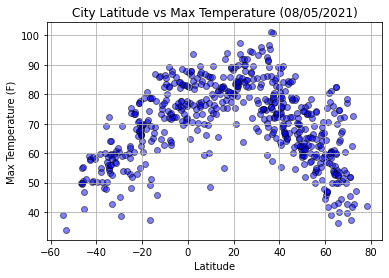

In [45]:
#Scatter plot for Latitude vs. Temperature

# set axes
x_axis = cities_df["Lat"]
y_axis = cities_df["Max Temp"]

#scatter plot
plt.scatter(x_axis, y_axis, marker="o", facecolors="blue", edgecolors="black", alpha=0.5)
plt.title("City Latitude vs Max Temperature (08/05/2021)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid(True)

#Save graph to a PNG file
plt.savefig("Output_Data/Lat_Temp.png")

The plot is showing how temperature changes as you move north (positive latitudes) and south (negative latitudes) around the world with 0 representing the equater. There seems to be a general trend that the temperature rises as you approach the center latitudes and drops as you move towards the more distant latitudes.

### Latitude vs. Humidity Plot

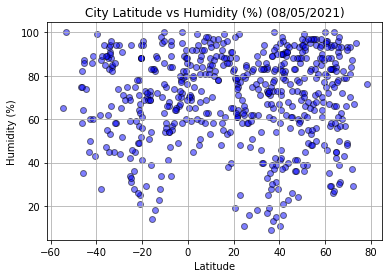

In [46]:
#Scatter plot for Latitude vs Humidity
# set axes
x_axis = cities_df["Lat"]
y_axis = cities_df["Humidity"]

#scatter plot
plt.scatter(x_axis, y_axis, marker="o", facecolors="blue", edgecolors="black", alpha=0.5)
plt.title("City Latitude vs Humidity (%) (08/05/2021)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(True)

#Save graph to a PNG file
plt.savefig("Output_Data/Lat_Humid.png")

The plot is showing how humidity changes as you move north (positive latitudes) and south (negative latitudes) around the world with 0 representing the equater. The data seems to show there is little correlation between latitude and humidity.

### Latitude vs. Cloudiness Plot

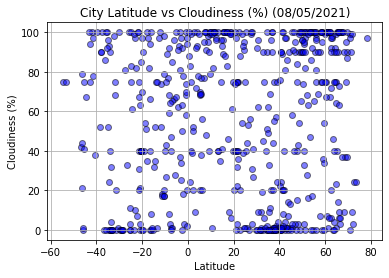

In [47]:
#Scatter plot for Latitude vs Cloudiness
# set axes
x_axis = cities_df["Lat"]
y_axis = cities_df["Cloudiness"]

#scatter plot
plt.scatter(x_axis, y_axis, marker="o", facecolors="blue", edgecolors="black", alpha=0.5)
plt.title("City Latitude vs Cloudiness (%) (08/05/2021)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(True)

#Save graph to a PNG file
plt.savefig("Output_Data/Lat_Cloud.png")

The plot is showing how percentage of cloudiness changes as you move north (positive latitudes) and south (negative latitudes) around the world with 0 representing the equater. The data appears to be pretty random with a lot of data points resting at the extremes of 0% and 100%.

### Latitude vs. Wind Speed Plot

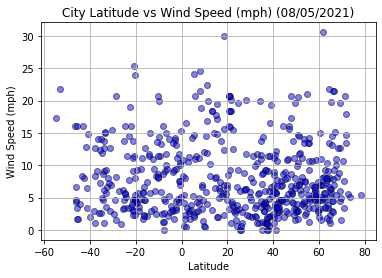

In [48]:
#Scatter plot for Latitude vs Wind Speed

# set axes
x_axis = cities_df["Lat"]
y_axis = cities_df["Wind Speed"]

#scatter plot
plt.scatter(x_axis, y_axis, marker="o", facecolors="blue", edgecolors="black", alpha=0.5)
plt.title("City Latitude vs Wind Speed (mph) (08/05/2021)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid(True)

#Save graph to a PNG file
plt.savefig("Output_Data/Lat_Wind.png")

The plot is showing how wind speed changes as you move north (positive latitudes) and south (negative latitudes) around the world with 0 representing the equater. Most of the data points appear to be below the 10 mph mark and there does not appear to be much correlation between the two variables.

## Linear Regression

#### Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is -0.6400141756297827


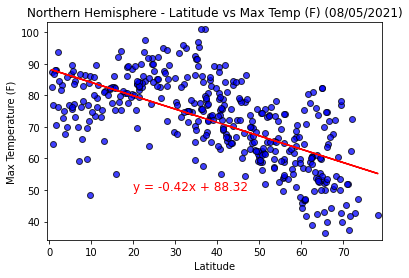

In [49]:
north_df = cities_df[cities_df["Lat"] >= 0]

x_axis = north_df['Lat']
y_axis = north_df['Max Temp']

#linear regression model
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)

#create equation line
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#create scatter plot
plt.scatter(x_axis,y_axis, marker="o", facecolors="blue", edgecolors="black", alpha = 0.75)
#add regression line
plt.plot(x_axis,regress_values,"r-")

#add regression equation
plt.annotate(line_eq, (20,50), fontsize=12, color="red")

#Scatter Plot formatting 
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.title("Northern Hemisphere - Latitude vs Max Temp (F) (08/05/2021)")




#Set limits
plt.ylim(y_axis.min() - 2, y_axis.max() + 2)  
plt.xlim(x_axis.min() -1, x_axis.max() +1)


#print correlation coefficient
print(f"The r-value is {rvalue}")

#Save graph to a PNG file
plt.savefig("Output_Data/NH_Lat_Temp.png")

#### Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is 0.7619276528768417


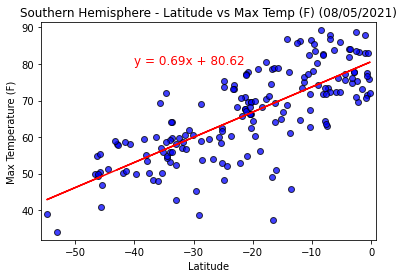

In [50]:
south_df = cities_df[cities_df["Lat"] < 0]

x_axis = south_df['Lat']
y_axis = south_df['Max Temp']

#linear regression model
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)

#create equation line
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#create scatter plot
plt.scatter(x_axis,y_axis, marker="o", facecolors="blue", edgecolors="black", alpha = 0.75)
#add regression line
plt.plot(x_axis,regress_values,"r-")

#add regression equation
plt.annotate(line_eq, (-40,80), fontsize=12, color="red")

#Scatter Plot formatting 
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.title("Southern Hemisphere - Latitude vs Max Temp (F) (08/05/2021)")




#Set limits
plt.ylim(y_axis.min() - 2, y_axis.max() + 2)  
plt.xlim(x_axis.min() -1, x_axis.max() +1)


#print correlation coefficient
print(f"The r-value is {rvalue}")

#Save graph to a PNG file
plt.savefig("Output_Data/SH_Lat_Temp.png")

The linear regression is modeling the relationship between latitude and temperature for the northern and southern hemispheres respectively. The relationships seem to be fairly strong with r values over .64 for both hemispheres. For the northern hemisphere, as you get farther from the equater, the temperature decreases. For the southern hemisphere, the closer you get to the equater, the higher the temperature gets.

#### Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is -0.048846976117453714


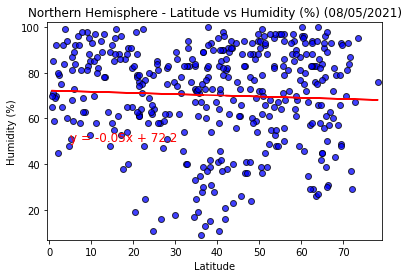

In [51]:
north_df = cities_df[cities_df["Lat"] >= 0]

x_axis = north_df['Lat']
y_axis = north_df['Humidity']

#linear regression model
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)

#create equation line
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#create scatter plot
plt.scatter(x_axis,y_axis, marker="o", facecolors="blue", edgecolors="black", alpha = 0.75)
#add regression line
plt.plot(x_axis,regress_values,"r-")

#add regression equation
plt.annotate(line_eq, (5,50), fontsize=12, color="red")

#Scatter Plot formatting 
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("Northern Hemisphere - Latitude vs Humidity (%) (08/05/2021)")




#Set limits
plt.ylim(y_axis.min() - 2, y_axis.max() + 2)  
plt.xlim(x_axis.min() -1, x_axis.max() +1)


#print correlation coefficient
print(f"The r-value is {rvalue}")

#Save graph to a PNG file
plt.savefig("Output_Data/NH_Lat_Humid.png")

#### Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is 0.003637557139995019


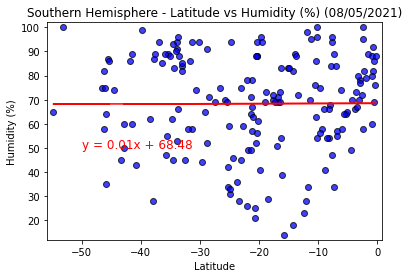

In [52]:
south_df = cities_df[cities_df["Lat"] < 0]

x_axis = south_df['Lat']
y_axis = south_df['Humidity']

#linear regression model
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)

#create equation line
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#create scatter plot
plt.scatter(x_axis,y_axis, marker="o", facecolors="blue", edgecolors="black", alpha = 0.75)
#add regression line
plt.plot(x_axis,regress_values,"r-")

#add regression equation
plt.annotate(line_eq, (-50,50), fontsize=12, color="red")

#Scatter Plot formatting 
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("Southern Hemisphere - Latitude vs Humidity (%) (08/05/2021)")




#Set limits
plt.ylim(y_axis.min() - 2, y_axis.max() + 2)  
plt.xlim(x_axis.min() -1, x_axis.max() +1)


#print correlation coefficient
print(f"The r-value is {rvalue}")

#Save graph to a PNG file
plt.savefig("Output_Data/SH_Lat_Humid.png")

The linear regression is modeling the relationship between latitude and humidity percentage for the northern and southern hemispheres respectively. The correlation between these variables is miniscule as both r values are below 0.05, with the southern hemisphere even being less than 0.01. There is a minimal change in humidity % as you move north or south on the latitudes.

#### Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is -0.025297874426078996


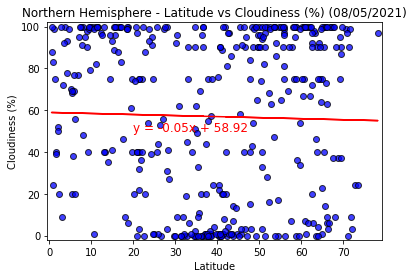

In [53]:
north_df = cities_df[cities_df["Lat"] >= 0]

x_axis = north_df['Lat']
y_axis = north_df['Cloudiness']

#linear regression model
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)

#create equation line
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#create scatter plot
plt.scatter(x_axis,y_axis, marker="o", facecolors="blue", edgecolors="black", alpha = 0.75)
#add regression line
plt.plot(x_axis,regress_values,"r-")

#add regression equation
plt.annotate(line_eq, (20,50), fontsize=12, color="red")

#Scatter Plot formatting 
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("Northern Hemisphere - Latitude vs Cloudiness (%) (08/05/2021)")




#Set limits
plt.ylim(y_axis.min() - 2, y_axis.max() + 2)  
plt.xlim(x_axis.min() -1, x_axis.max() +1)


#print correlation coefficient
print(f"The r-value is {rvalue}")

#Save graph to a PNG file
plt.savefig("Output_Data/NH_Lat_Cloud.png")

#### Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is 0.020843943138031614


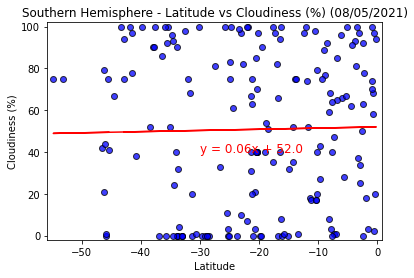

In [54]:
south_df = cities_df[cities_df["Lat"] < 0]

x_axis = south_df['Lat']
y_axis = south_df['Cloudiness']

#linear regression model
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)

#create equation line
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#create scatter plot
plt.scatter(x_axis,y_axis, marker="o", facecolors="blue", edgecolors="black", alpha = 0.75)
#add regression line
plt.plot(x_axis,regress_values,"r-")

#add regression equation
plt.annotate(line_eq, (-30,40), fontsize=12, color="red")

#Scatter Plot formatting 
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("Southern Hemisphere - Latitude vs Cloudiness (%) (08/05/2021)")




#Set limits
plt.ylim(y_axis.min() - 2, y_axis.max() + 2)  
plt.xlim(x_axis.min() -1, x_axis.max() +1)


#print correlation coefficient
print(f"The r-value is {rvalue}")

#Save graph to a PNG file
plt.savefig("Output_Data/SH_Lat_Cloudy.png")

The linear regression is modeling the relationship between latitude and percentage of cloudiness for the northern and southern hemispheres respectively. The data is about as random as it could be with small r values for both hemispheres.There is no change in cloudiness % as you change latitude for either hemisphere.

#### Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is -0.037823991775636216


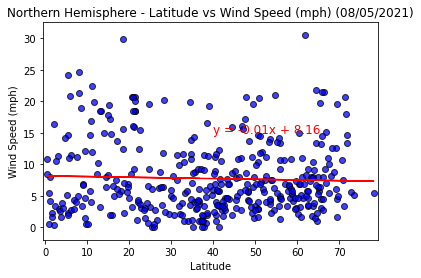

In [55]:
north_df = cities_df[cities_df["Lat"] >= 0]

x_axis = north_df['Lat']
y_axis = north_df['Wind Speed']

#linear regression model
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)

#create equation line
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#create scatter plot
plt.scatter(x_axis,y_axis, marker="o", facecolors="blue", edgecolors="black", alpha = 0.75)
#add regression line
plt.plot(x_axis,regress_values,"r-")

#add regression equation
plt.annotate(line_eq, (40,15), fontsize=12, color="red")

#Scatter Plot formatting 
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.title("Northern Hemisphere - Latitude vs Wind Speed (mph) (08/05/2021)")




#Set limits
plt.ylim(y_axis.min() - 2, y_axis.max() + 2)  
plt.xlim(x_axis.min() -1, x_axis.max() +1)


#print correlation coefficient
print(f"The r-value is {rvalue}")

#Save graph to a PNG file
plt.savefig("Output_Data/NH_Lat_Wind.png")

#### Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is -0.050415972118363246


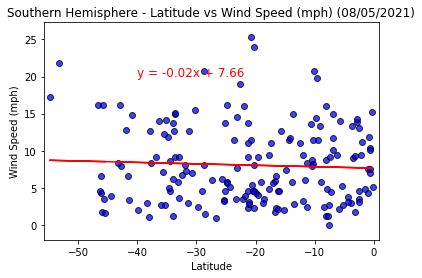

In [56]:
south_df = cities_df[cities_df["Lat"] < 0]

x_axis = south_df['Lat']
y_axis = south_df['Wind Speed']

#linear regression model
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)

#create equation line
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#create scatter plot
plt.scatter(x_axis,y_axis, marker="o", facecolors="blue", edgecolors="black", alpha = 0.75)
#add regression line
plt.plot(x_axis,regress_values,"r-")

#add regression equation
plt.annotate(line_eq, (-40,20), fontsize=12, color="red")

#Scatter Plot formatting 
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.title("Southern Hemisphere - Latitude vs Wind Speed (mph) (08/05/2021)")




#Set limits
plt.ylim(y_axis.min() - 2, y_axis.max() + 2)  
plt.xlim(x_axis.min() -1, x_axis.max() +1)


#print correlation coefficient
print(f"The r-value is {rvalue}")

#Save graph to a PNG file
plt.savefig("Output_Data/SH_Lat_Wind.png")

The linear regression is modeling the relationship between latitude and wind speed for the northern and southern hemispheres respectively. There is a minimal correlation between these variables, as once again they both fall below an r value of 0.06. There is minimal change in wind wpeed as you move north or south on the latitudes.